In [13]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
TRAIN_DIR = 'C:/Users/Ibrahim/Downloads/Semester 10/CVPR [A]/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:00<00:00, 8012.15it/s]

50000


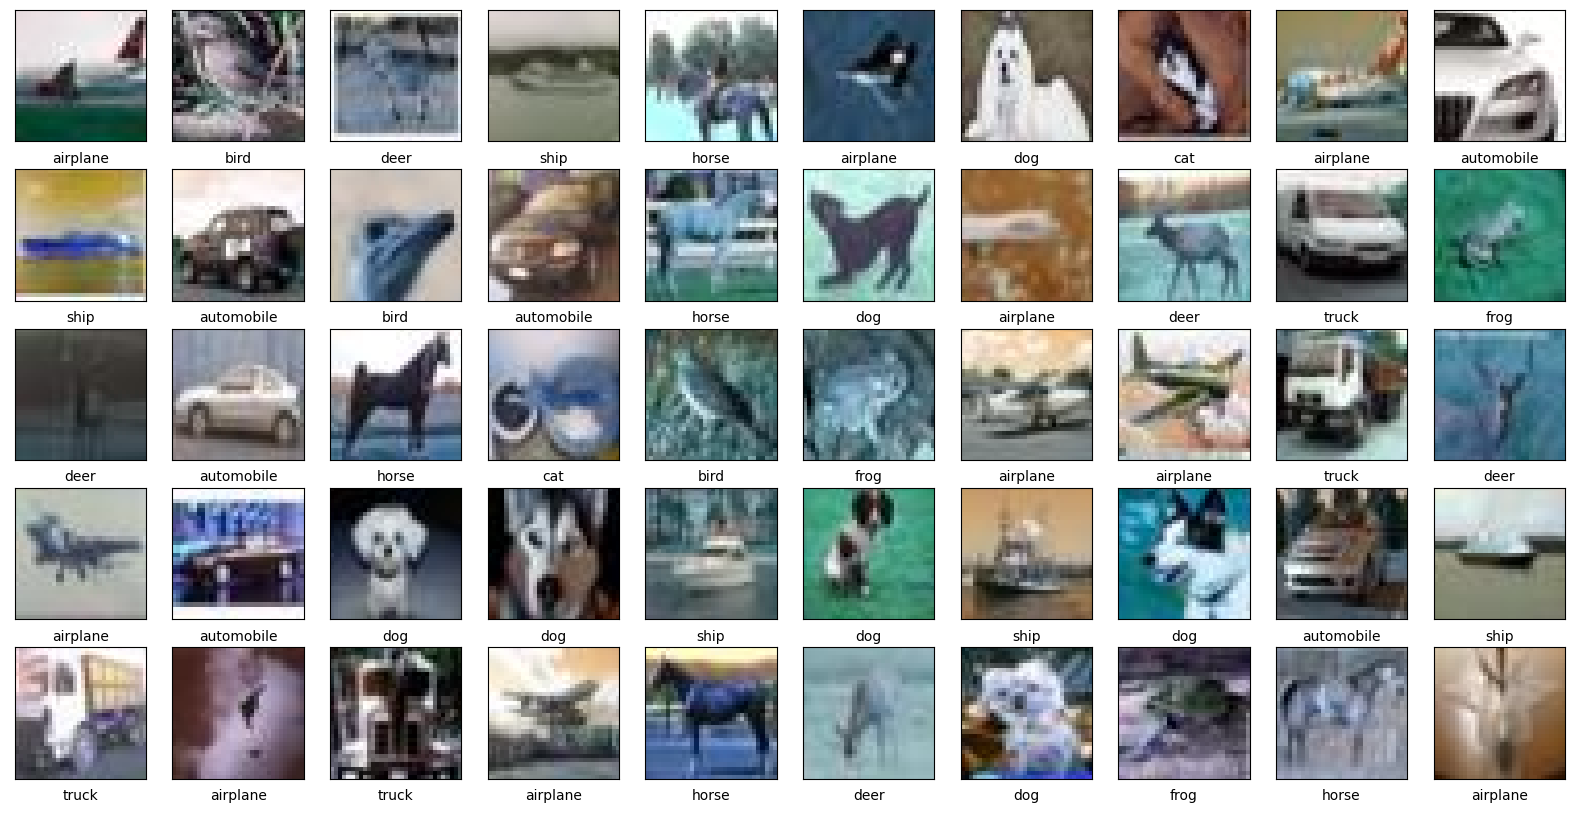

In [22]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [25]:
f0 = TRAIN_DATA[0:100]
f1 = TRAIN_DATA[100:200]
f2 = TRAIN_DATA[200:300]
f3 = TRAIN_DATA[300:400]
f4 = TRAIN_DATA[400:500]

In [26]:
k_choice=[3,5,7,9,11,13,15,17,19,21]
xyp1=[]
xyp2=[]
def accuracy(f, count, k, ls):
    if(ls==1):
        acc = (count/100)*100
        xyp1.append([k,acc])
        print("L1 dist: For K=", k, "& Fold=", f, "Accuracy=", acc, "%")
        if(len(xyp1)==50):  
            draw_graph(xyp1,'L1 Dist')
        
    elif (ls==2):
        acc = (count/100)*100
        xyp2.append([k,acc])
        print("L2 dist: For K=", k, "& Fold=", f, "Accuracy=", acc, "%")
        if(len(xyp2)==50):         
            draw_graph(xyp2,'L2 Dist')

def draw_graph(xyp,dist):
    for i in range(len(xyp)):
        plt.plot(xyp[i][0],xyp[i][1],'o')
    av=[]
    for i in range(0,len(xyp),5):
        sum=0
        for j in range(5):
            sum+=xyp[i+j][1]   
        av.append(sum/5)
    
    plt.xlabel('K')
    plt.ylabel('Accuracy(%)')
    best_k=sorted(xyp, key = lambda x: x[1])
    plt.title(f"{dist}  Best K= {best_k[49][0]}")
    x_ticks = [1, 3, 5, 7,9,11,13,15,17,19,21,23]
    plt.errorbar(k_choice, av, yerr=3.5)
    plt.xticks(ticks=x_ticks)
    plt.show()

def pred(f, train, validation, k):
    count1 = 0
    count2 = 0
    scores1 = []
    scores2 = []
    hscores1 = []
    hscores2 = []
    for v in validation:
        for t in train:
            l1_dist=np.sum(abs(t[0]-v[0]))
            l2_dist = np.sqrt(np.sum(np.square(t[0] - v[0])))
            scores1.append([l1_dist, t[1]])
            scores2.append([l2_dist, t[1]])
        scores1.sort()
        scores2.sort()

        for i in range(k):
            hscores1.append(scores1[i][1])
        pcls1 = max(hscores1, key=hscores1.count)
        if (pcls1 == v[1]):
            count1 += 1

        for i in range(k):
            hscores2.append(scores2[i][1])
        pcls2 = max(hscores2, key=hscores2.count)
        if (pcls2 == v[1]):
            count2 += 1

    accuracy(f, count1, k, 1)
    accuracy(f, count2, k, 2)


for k in k_choice:
    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
            pred(1, train, validation, k)            
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
            pred(2, train, validation,k)
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
            pred(3, train, validation,k)
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
            pred(4, train, validation,k)
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4
            pred(5, train, validation,k)

L1 dist: For K= 3 & Fold= 1 Accuracy= 110.00000000000001 %
L2 dist: For K= 3 & Fold= 1 Accuracy= 111.00000000000001 %


KeyboardInterrupt: 